In [1]:
import pandas as pd

df = pd.read_csv('GOOG.csv') #read in csv file

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4778,2023-08-14,129.850006,131.910004,129.589996,131.830002,131.830002,17526200
4779,2023-08-15,131.589996,131.990005,129.819000,130.270004,130.270004,14769200
4780,2023-08-16,129.279999,130.897995,128.460007,129.110001,129.110001,17548400
4781,2023-08-17,130.449997,132.490997,129.850006,130.460007,130.460007,23665600


In [2]:
df = df[['Date', 'Close']] #extracting 2 necessary columns

df

,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104
...,...,...
4778,2023-08-14,131.830002
4779,2023-08-15,130.270004
4780,2023-08-16,129.110001
4781,2023-08-17,130.460007


In [3]:
import datetime

def string_to_date(s): #function to convert to datetime type
    delimiter = s.split('-') #split string to list
    year, month, date = int(delimiter[0]), int(delimiter[1]), int(delimiter[2])
    return datetime.datetime(year = year, month = month, day = date)

datetime_object = string_to_date('2004-08-19')
datetime_object

datetime.datetime(2004, 8, 19, 0, 0)

In [4]:
df['Date'] = df['Date'].apply(string_to_date) #apply the function to the column
df

/var/folders/9q/8zng8cns07n7749vcv3spbrr0000gn/T/ipykernel_7820/283959042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(string_to_date) #apply the function to the column


,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104
...,...,...
4778,2023-08-14,131.830002
4779,2023-08-15,130.270004
4780,2023-08-16,129.110001
4781,2023-08-17,130.460007


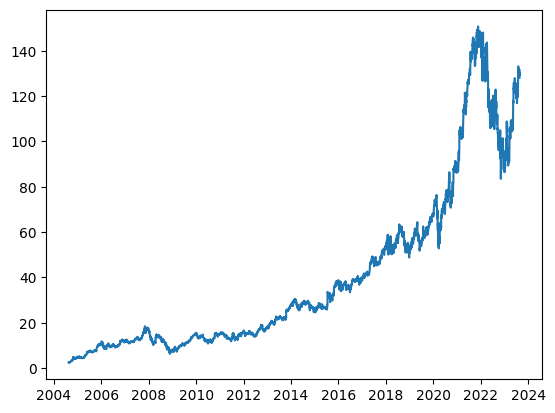

In [5]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Close']) #plotting stock price change over time

In [6]:
import numpy as np

def window_data(data, start_date_str, end_date_str, n=3): #function to modify data to a windowed dataset
    start_date = string_to_date(start_date_str) #convert to date
    end_date  = string_to_date(end_date_str)

    windowed_data = pd.DataFrame()
    windowed_data['Date'] = data['Date'].loc[data['Date'] > start_date_str] #filter data to only the ones after the start date 
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i) #shift the data by i steps
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()

windowed_df = window_data(df, '2018-08-18', '2023-08-18', n=3)
windowed_df = windowed_df.reset_index(drop=True)
windowed_df

,Date,Target-3,Target-2,Target-1,Target
0,2018-08-20,60.719002,60.324501,60.048000,60.388500
1,2018-08-21,60.324501,60.048000,60.388500,60.081001
2,2018-08-22,60.048000,60.388500,60.081001,60.366501
3,2018-08-23,60.388500,60.081001,60.366501,60.269001
4,2018-08-24,60.081001,60.366501,60.269001,61.032501
...,...,...,...,...,...
1253,2023-08-14,130.149994,130.210007,130.169998,131.830002
1254,2023-08-15,130.210007,130.169998,131.830002,130.270004
1255,2023-08-16,130.169998,131.830002,130.270004,129.110001
1256,2023-08-17,131.830002,130.270004,129.110001,130.460007


In [7]:
def window_to_matrix_X_Y(windowed_dataframe): #function to convert the window to matrix
    df_to_np = windowed_dataframe.to_numpy()
    dates = df_to_np[:, 0] #extract the first column
    X = df_to_np[:, 1:-1] 
    Y = df_to_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32) #convert to the correct type for analysis

dates, X, Y = window_to_matrix_X_Y(windowed_df)

dates.shape, X.shape, Y.shape

((1258,), (1258, 3), (1258,))

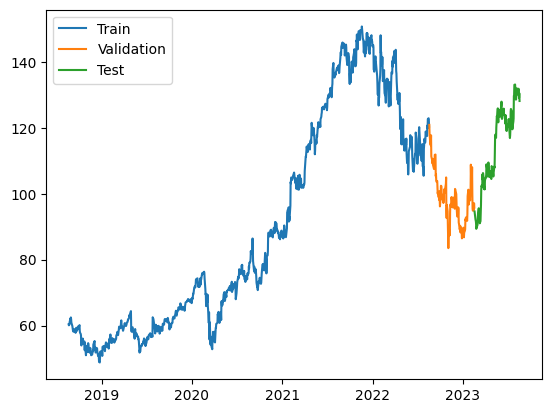

In [8]:
data_80 = int(len(dates) * 0.8) #extract 80% of the dataset
data_90 = int(len(dates) * 0.9) #extract 90% of the dataset

dates_train, X_train, Y_train = dates[:data_80], X[:data_80], Y[:data_80] #data for the training set
dates_val, X_val, Y_val = dates[data_80:data_90], X[data_80:data_90], Y[data_80:data_90] #data for the validation set
dates_test, X_test, Y_test = dates[data_90:], X[data_90:], Y[data_90:] #data for the test set

plt.plot(dates_train, Y_train, label = "Train")
plt.plot(dates_val, Y_val, label = "Validation")
plt.plot(dates_test, Y_test, label = "Test")
plt.legend(loc = "upper left")

In [9]:
from tensorflow.keras.models import Sequential #import tensorflow models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)), #define the sequential neural network model
                    layers.LSTM(64), #LSTM layer
                    layers.Dense(32, activation = 'relu'), #Dense layer
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)]) #Output layer

model.compile(loss = 'mse', #mean squared error
              optimizer = Adam(learning_rate = 0.001), 
              metrics = ['mean_absolute_error'])

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 100)

Epoch 1/100


2023-08-20 22:13:56.833946: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 9ms/step - loss: 8810.1934 - mean_absolute_error: 88.1427 - val_loss: 9210.2471 - val_mean_absolute_error: 95.6730
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7975.7031 - mean_absolute_error: 83.1043 - val_loss: 7411.8354 - val_mean_absolute_error: 85.7504
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4776.5664 - mean_absolute_error: 59.1574 - val_loss: 1920.5244 - val_mean_absolute_error: 43.1140
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1273.6484 - mean_absolute_error: 28.8485 - val_loss: 66.4338 - val_mean_absolute_error: 6.2545
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 969.9579 - mean_absolute_error: 28.2703 - val_loss: 130.1791 - val_mean_absolute_error: 9.3618
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 619.7563 - mean_absolute_error: 21.2739 - val_loss: 42.3555 - val_mean_absolute_error: 5.4

32/32 [==============================] - 0s 608us/step


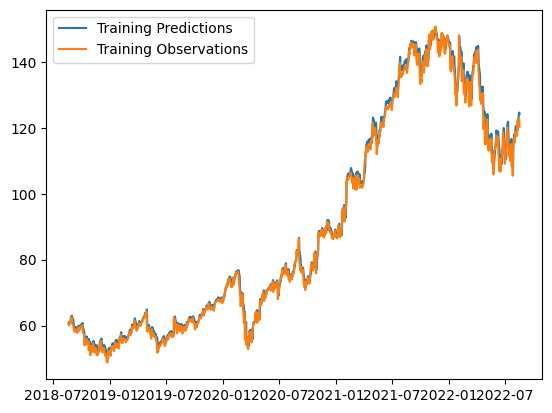

In [10]:
train_prediction = model.predict(X_train).flatten() #plotting the actual data against the prediction

plt.plot(dates_train, train_prediction, label = 'Training Predictions')
plt.plot(dates_train, Y_train, label = 'Training Observations')
plt.legend(loc = "upper left")

4/4 [==============================] - 0s 896us/step


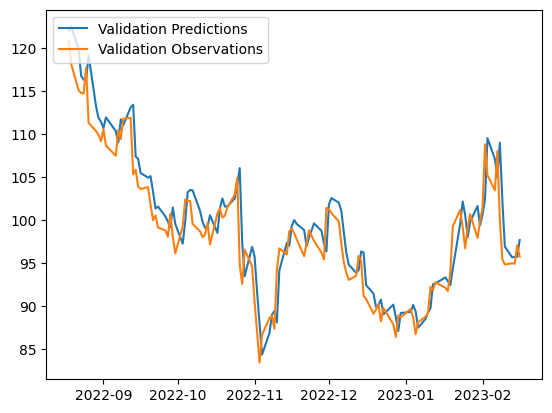

In [11]:
val_prediction = model.predict(X_val).flatten()

plt.plot(dates_val, val_prediction, label = 'Validation Predictions')
plt.plot(dates_val, Y_val, label = 'Validation Observations')
plt.legend(loc = "upper left")

4/4 [==============================] - 0s 753us/step


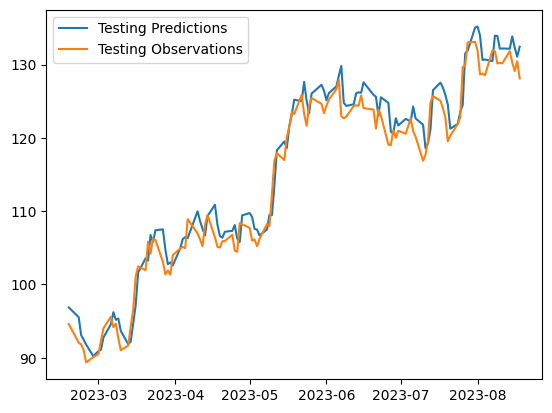

In [12]:
test_prediction = model.predict(X_test).flatten()

plt.plot(dates_test, test_prediction, label = 'Testing Predictions')
plt.plot(dates_test, Y_test, label = 'Testing Observations')
plt.legend(loc = "upper left")

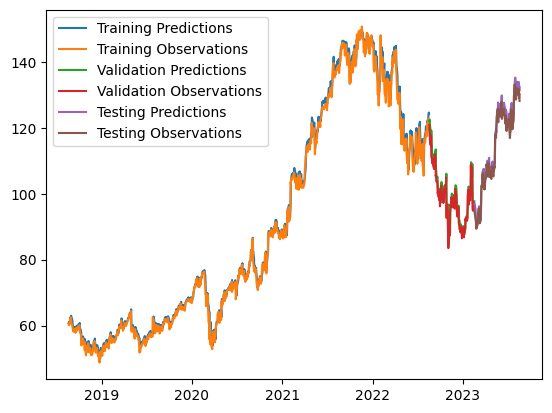

In [13]:
plt.plot(dates_train, train_prediction, label = 'Training Predictions')
plt.plot(dates_train, Y_train, label = 'Training Observations')
plt.plot(dates_val, val_prediction, label = 'Validation Predictions')
plt.plot(dates_val, Y_val, label = 'Validation Observations')
plt.plot(dates_test, test_prediction, label = 'Testing Predictions')
plt.plot(dates_test, Y_test, label = 'Testing Observations')
plt.legend(loc = "upper left")

In [14]:
from copy import deepcopy #testing the recursive approach

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

last_window = deepcopy(X_train[-1])
for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 11ms/step


/var/folders/9q/8zng8cns07n7749vcv3spbrr0000gn/T/ipykernel_7820/203988267.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_window[-1] = next_prediction


1/1 [==============================] - 0s 10ms/step


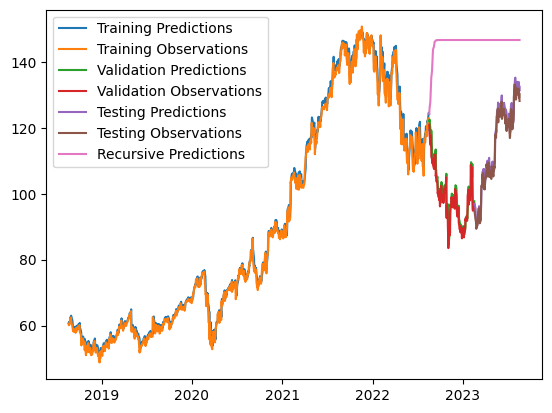

In [15]:
plt.plot(dates_train, train_prediction, label = 'Training Predictions')
plt.plot(dates_train, Y_train, label = 'Training Observations')
plt.plot(dates_val, val_prediction, label = 'Validation Predictions')
plt.plot(dates_val, Y_val, label = 'Validation Observations')
plt.plot(dates_test, test_prediction, label = 'Testing Predictions')
plt.plot(dates_test, Y_test, label = 'Testing Observations')
plt.plot(recursive_dates, recursive_predictions, label = 'Recursive Predictions')
plt.legend(loc = "upper left")